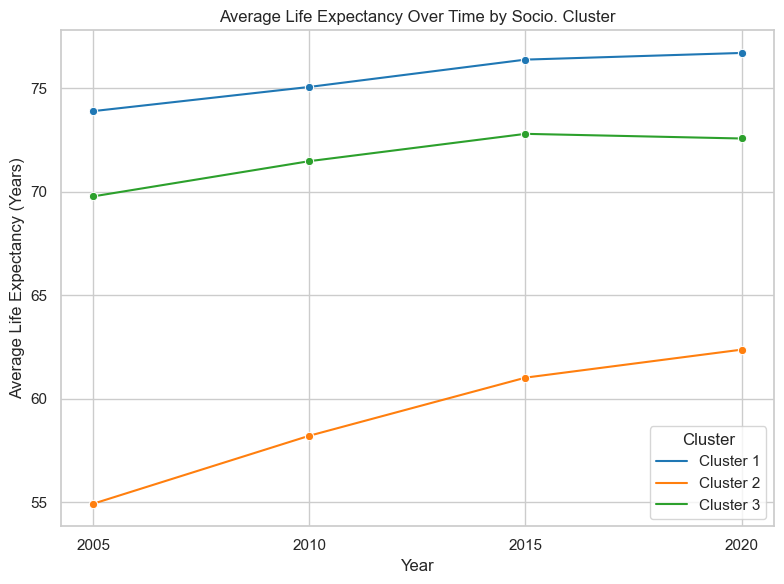

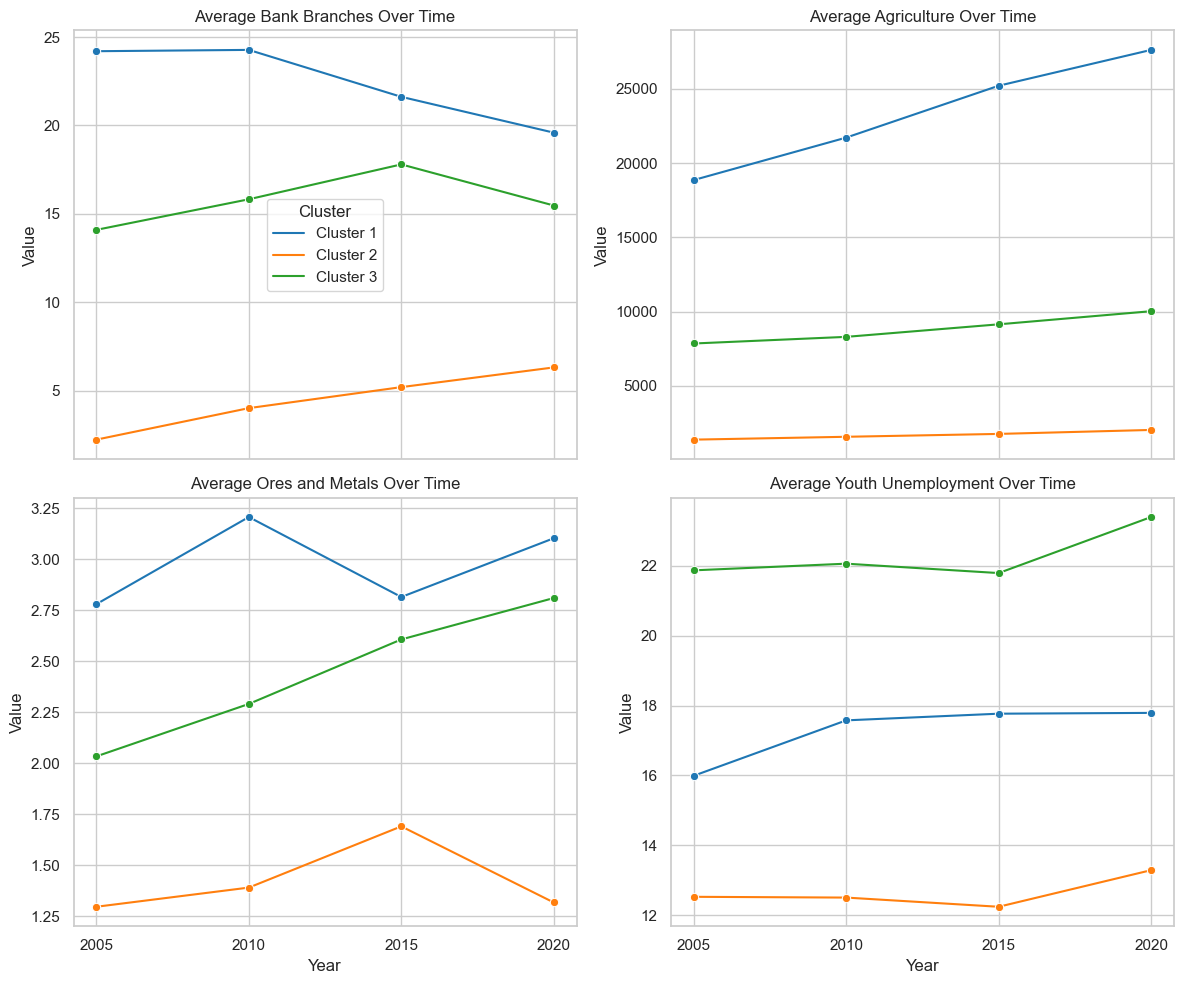

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn theme for a clean look
sns.set_theme(style="whitegrid")

# Data for each cluster and indicator over the years
data = {
    'Cluster 1': {
        'Life Expectancy': {2005: 73.897, 2010: 75.066, 2015: 76.386, 2020: 76.708},
        'Bank Branches': {2005: 24.199, 2010: 24.273, 2015: 21.620, 2020: 19.596},
        'Agriculture': {2005: 18862.370, 2010: 21723.341, 2015: 25217.292, 2020: 27633.866},
        'Ores and Metals': {2005: 2.780, 2010: 3.207, 2015: 2.815, 2020: 3.103},
        'Youth Unemployment': {2005: 15.991, 2010: 17.577, 2015: 17.768, 2020: 17.791}
    },
    'Cluster 2': {
        'Life Expectancy': {2005: 54.926, 2010: 58.211, 2015: 61.018, 2020: 62.371},
        'Bank Branches': {2005: 2.244, 2010: 4.025, 2015: 5.212, 2020: 6.326},
        'Agriculture': {2005: 1365.428, 2010: 1557.895, 2015: 1751.192, 2020: 2019.148},
        'Ores and Metals': {2005: 1.297, 2010: 1.391, 2015: 1.691, 2020: 1.318},
        'Youth Unemployment': {2005: 12.524, 2010: 12.502, 2015: 12.239, 2020: 13.287}
    },
    'Cluster 3': {
        'Life Expectancy': {2005: 69.777, 2010: 71.479, 2015: 72.799, 2020: 72.574},
        'Bank Branches': {2005: 14.101, 2010: 15.830, 2015: 17.801, 2020: 15.478},
        'Agriculture': {2005: 7845.183, 2010: 8292.586, 2015: 9137.110, 2020: 10021.954},
        'Ores and Metals': {2005: 2.034, 2010: 2.291, 2015: 2.607, 2020: 2.810},
        'Youth Unemployment': {2005: 21.873, 2010: 22.064, 2015: 21.795, 2020: 23.400}
    }
}

# Build a DataFrame from the raw values for each cluster, indicator, and year
rows = []
for cluster, indicators in data.items():
    for indicator, year_values in indicators.items():
        for year, value in year_values.items():
            rows.append({
                'Cluster': cluster,
                'Indicator': indicator,
                'Year': year,
                'Value': value
            })
            
df = pd.DataFrame(rows)

# Separate the Life Expectancy (LEB) data from the rest
df_leb = df[df['Indicator'] == 'Life Expectancy']
df_rest = df[df['Indicator'] != 'Life Expectancy']

# ------------------------
# Plot for Life Expectancy
# ------------------------
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=df_leb,
    x='Year',
    y='Value',
    hue='Cluster',
    marker='o',
    palette='tab10'
)
plt.title('Average Life Expectancy Over Time by Socio. Cluster')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.xticks([2005, 2010, 2015, 2020])
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# -------------------------------------
# 2x2 Grid for the Other 4 Indicators
# -------------------------------------
other_indicators = df_rest['Indicator'].unique()

fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)
axs = axs.flatten()

for i, indicator in enumerate(other_indicators):
    subset = df_rest[df_rest['Indicator'] == indicator]
    sns.lineplot(
        data=subset,
        x='Year',
        y='Value',
        hue='Cluster',
        marker='o',
        palette='tab10',
        ax=axs[i]
    )
    axs[i].set_title(f'Average {indicator} Over Time')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')
    axs[i].set_xticks([2005, 2010, 2015, 2020])
    if i == 0:
        axs[i].legend(title='Cluster')
    else:
        axs[i].legend().remove()

plt.tight_layout()
plt.show()


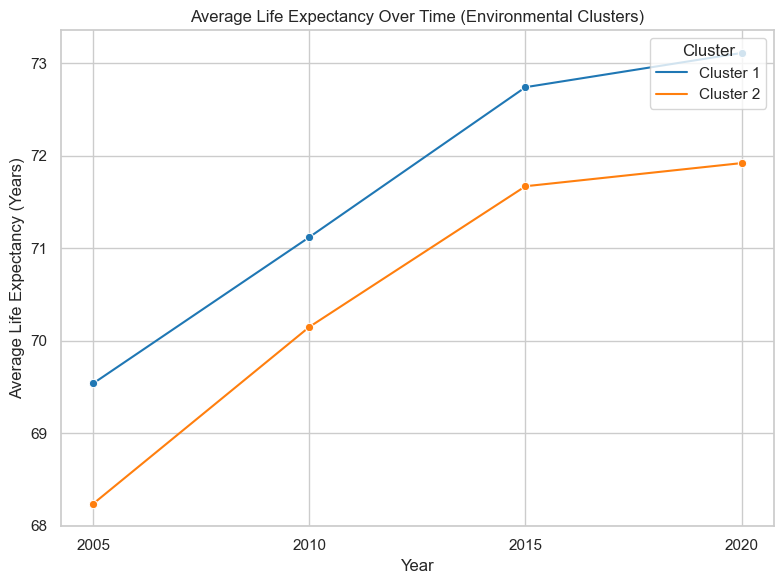

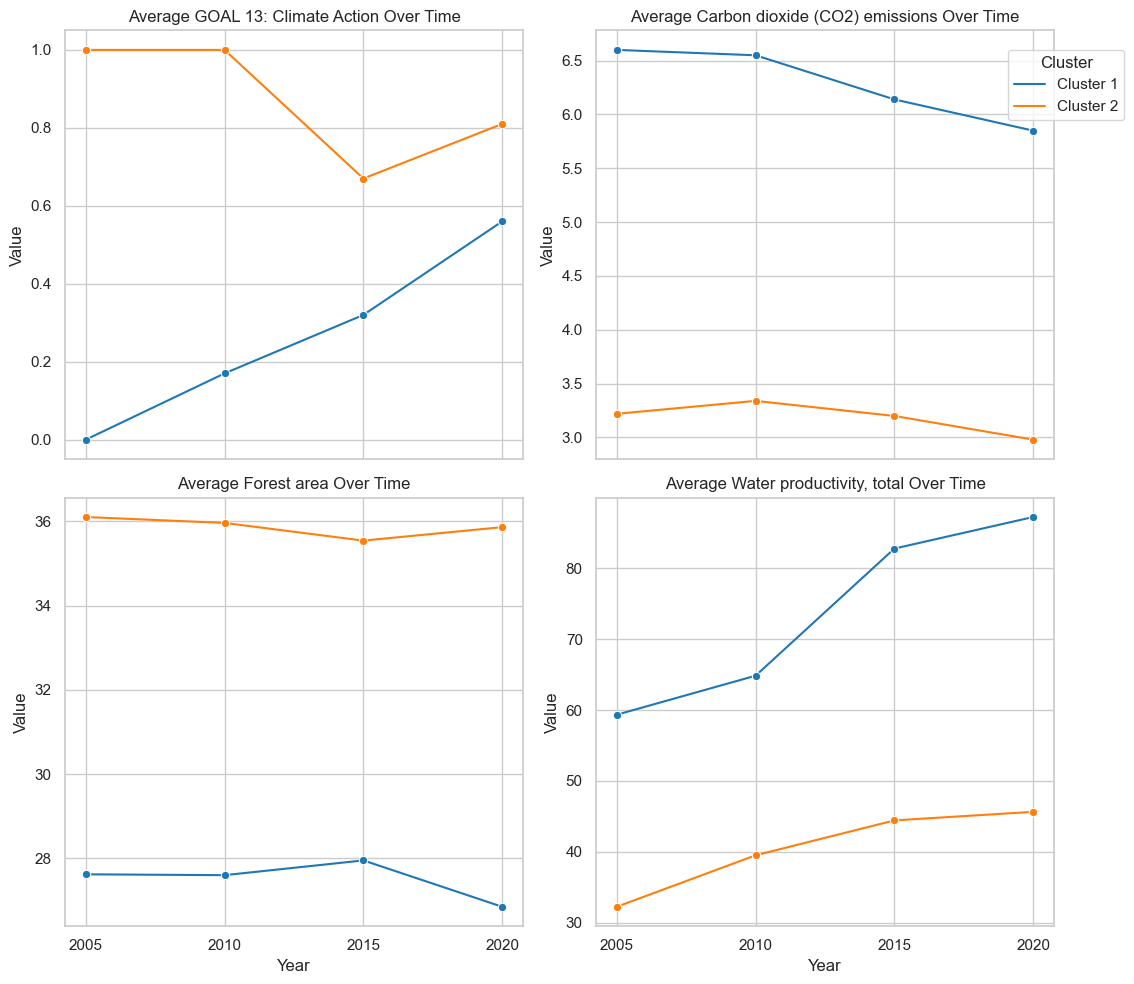

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn theme for a clean look
sns.set_theme(style="whitegrid")

# Environmental data from Table 9
data_env = {
    'Cluster 1': {
        'Life Expectancy': {2005: 69.54, 2010: 71.12, 2015: 72.74, 2020: 73.11},
        'GOAL 13: Climate Action': {2005: 0.00, 2010: 0.17, 2015: 0.32, 2020: 0.56},
        'Carbon dioxide (CO2) emissions': {2005: 6.60, 2010: 6.55, 2015: 6.14, 2020: 5.85},
        'Forest area': {2005: 27.62, 2010: 27.60, 2015: 27.95, 2020: 26.85},
        'Water productivity, total': {2005: 59.34, 2010: 64.84, 2015: 82.77, 2020: 87.22}
    },
    'Cluster 2': {
        'Life Expectancy': {2005: 68.24, 2010: 70.15, 2015: 71.67, 2020: 71.92},
        'GOAL 13: Climate Action': {2005: 1.00, 2010: 1.00, 2015: 0.67, 2020: 0.81},
        'Carbon dioxide (CO2) emissions': {2005: 3.22, 2010: 3.34, 2015: 3.20, 2020: 2.98},
        'Forest area': {2005: 36.10, 2010: 35.96, 2015: 35.54, 2020: 35.86},
        'Water productivity, total': {2005: 32.25, 2010: 39.51, 2015: 44.43, 2020: 45.64}
    }
}

# Build a DataFrame from the raw values for each cluster, indicator, and year
rows = []
for cluster, indicators in data_env.items():
    for indicator, year_values in indicators.items():
        for year, value in year_values.items():
            rows.append({
                'Cluster': cluster,
                'Indicator': indicator,
                'Year': year,
                'Value': value
            })
df_env = pd.DataFrame(rows)

# Separate the Life Expectancy data from the other indicators
df_leb_env = df_env[df_env['Indicator'] == 'Life Expectancy']
df_rest_env = df_env[df_env['Indicator'] != 'Life Expectancy']

# ------------------------------
# Plot for Life Expectancy
# ------------------------------
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=df_leb_env, 
    x='Year', 
    y='Value', 
    hue='Cluster', 
    marker='o', 
    palette='tab10'
)
ax.set_title('Average Life Expectancy Over Time (Environmental Clusters)')
ax.set_xlabel('Year')
ax.set_ylabel('Average Life Expectancy (Years)')
ax.set_xticks([2005, 2010, 2015, 2020])
ax.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 2x2 Grid for the Other 4 Environmental Indicators
# ------------------------------------------------------
# Identify the other indicators (GOAL 13, CO2, Forest area, Water productivity)
other_indicators_env = df_rest_env['Indicator'].unique()

fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)
axs = axs.flatten()  # Flatten the grid for easier iteration

# Create a line plot for each indicator and remove individual legends
for i, indicator in enumerate(other_indicators_env):
    subset = df_rest_env[df_rest_env['Indicator'] == indicator]
    sns.lineplot(
        data=subset,
        x='Year',
        y='Value',
        hue='Cluster',
        marker='o',
        palette='tab10',
        ax=axs[i]
    )
    axs[i].set_title(f'Average {indicator} Over Time')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')
    axs[i].set_xticks([2005, 2010, 2015, 2020])
    # Remove the legend for each individual subplot
    axs[i].get_legend().remove()

# Create a single global legend at the top right of the figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95), title='Cluster')

# Adjust the layout to make room for the global legend
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


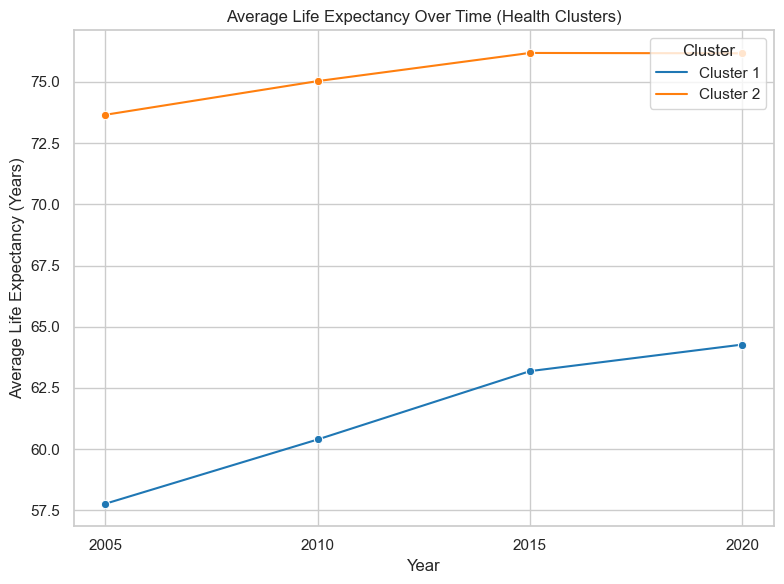

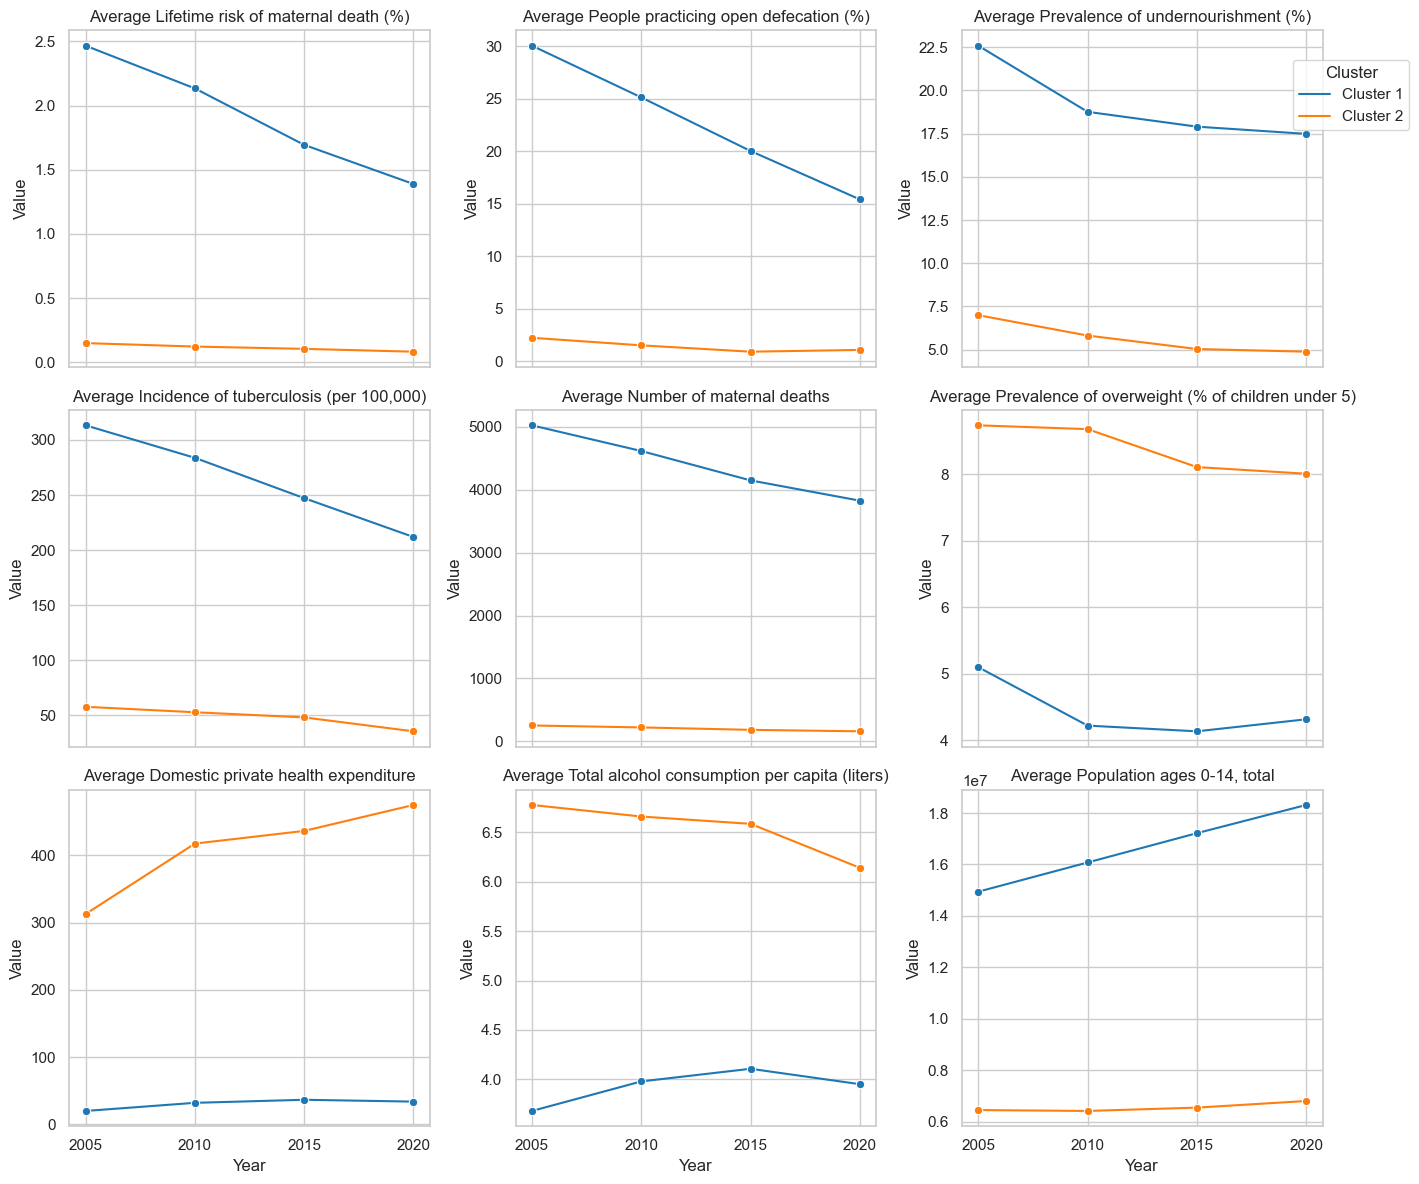

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn theme for a clean look
sns.set_theme(style="whitegrid")

# Health data from Table 13
data_health = {
    'Cluster 1': {
        'Life Expectancy': {2005: 57.776, 2010: 60.398, 2015: 63.188, 2020: 64.272},
        'Lifetime risk of maternal death (%)': {2005: 2.467, 2010: 2.134, 2015: 1.694, 2020: 1.389},
        'People practicing open defecation (%)': {2005: 30.039, 2010: 25.119, 2015: 20.018, 2020: 15.410},
        'Prevalence of undernourishment (%)': {2005: 22.589, 2010: 18.762, 2015: 17.904, 2020: 17.487},
        'Incidence of tuberculosis (per 100,000)': {2005: 313.309, 2010: 283.798, 2015: 247.213, 2020: 211.935},
        'Number of maternal deaths': {2005: 5023.505, 2010: 4615.484, 2015: 4148.356, 2020: 3826.008},
        'Prevalence of overweight (% of children under 5)': {2005: 5.096, 2010: 4.217, 2015: 4.131, 2020: 4.312},
        'Domestic private health expenditure': {2005: 20.124, 2010: 32.199, 2015: 36.721, 2020: 34.004},
        'Total alcohol consumption per capita (liters)': {2005: 3.680, 2010: 3.979, 2015: 4.107, 2020: 3.951},
        'Population ages 0-14, total': {2005: 14943161.678, 2010: 16078116.082, 2015: 17217157.593, 2020: 18314101.302}
    },
    'Cluster 2': {
        'Life Expectancy': {2005: 73.653, 2010: 75.028, 2015: 76.177, 2020: 76.162},
        'Lifetime risk of maternal death (%)': {2005: 0.149, 2010: 0.122, 2015: 0.104, 2020: 0.082},
        'People practicing open defecation (%)': {2005: 2.237, 2010: 1.518, 2015: 0.914, 2020: 1.082},
        'Prevalence of undernourishment (%)': {2005: 6.989, 2010: 5.812, 2015: 5.033, 2020: 4.878},
        'Incidence of tuberculosis (per 100,000)': {2005: 57.780, 2010: 52.811, 2015: 48.150, 2020: 35.509},
        'Number of maternal deaths': {2005: 251.881, 2010: 221.000, 2015: 182.283, 2020: 158.854},
        'Prevalence of overweight (% of children under 5)': {2005: 8.735, 2010: 8.678, 2015: 8.107, 2020: 8.007},
        'Domestic private health expenditure': {2005: 312.725, 2010: 417.392, 2015: 436.216, 2020: 474.766},
        'Total alcohol consumption per capita (liters)': {2005: 6.778, 2010: 6.661, 2015: 6.587, 2020: 6.142},
        'Population ages 0-14, total': {2005: 6452706.302, 2010: 6418491.733, 2015: 6548088.810, 2020: 6805112.455}
    }
}

# Build a DataFrame from the raw values for each cluster, indicator, and year
rows = []
for cluster, indicators in data_health.items():
    for indicator, year_values in indicators.items():
        for year, value in year_values.items():
            rows.append({
                'Cluster': cluster,
                'Indicator': indicator,
                'Year': year,
                'Value': value
            })
df_health = pd.DataFrame(rows)

# Separate the Life Expectancy data from the remaining indicators
df_leb_health = df_health[df_health['Indicator'] == 'Life Expectancy']
df_rest_health = df_health[df_health['Indicator'] != 'Life Expectancy']

# ------------------------------
# Plot for Life Expectancy
# ------------------------------
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=df_leb_health,
    x='Year',
    y='Value',
    hue='Cluster',
    marker='o',
    palette='tab10'
)
ax.set_title('Average Life Expectancy Over Time (Health Clusters)')
ax.set_xlabel('Year')
ax.set_ylabel('Average Life Expectancy (Years)')
ax.set_xticks([2005, 2010, 2015, 2020])
ax.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# Create a 3x3 Grid for the Other 9 Health Indicators
# ------------------------------------------------------
other_indicators_health = df_rest_health['Indicator'].unique()

fig, axs = plt.subplots(3, 3, figsize=(15, 12), sharex=True)
axs = axs.flatten()  # Flatten the grid for easier iteration

for i, indicator in enumerate(other_indicators_health):
    subset = df_rest_health[df_rest_health['Indicator'] == indicator]
    sns.lineplot(
        data=subset,
        x='Year',
        y='Value',
        hue='Cluster',
        marker='o',
        palette='tab10',
        ax=axs[i]
    )
    axs[i].set_title(f'Average {indicator}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')
    axs[i].set_xticks([2005, 2010, 2015, 2020])
    # Remove individual legends
    axs[i].get_legend().remove()

# Create a single, global legend using handles from one of the subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95), title='Cluster')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to make room for the global legend
plt.show()
